In [2]:
import torch
import numpy as np

**BackPropagation**

Notes and examples taken from the following tutoriel : https://www.youtube.com/watch?v=c36lUUr864M

In [4]:
x = torch.tensor(1.)
y = torch.tensor(2.)

w = torch.tensor(1., requires_grad=True)  #We want gradient of w

# Forward pass

y_hat = w*x
loss = (y_hat - y)**2
print(loss)

# Backward pass

loss.backward()  #Calculate jacobian and local derivation
print(w.grad)  #We find the value of our gradient

# For the following:
# update weights
# next foward and backfoward



tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


**Gradient descent**
We begin by calculating the gradient descent manually. In fact, we can seperate the sequence : 

- Model prediction : Manual
- Gradient : Manual
- Loss : Manual
- Update weights : Manual

In [26]:
# f = w * x --> (weights * input)
# f = 2 * x
X = np.array([1, 2, 3, 4], dtype=np.float32)  #training value
Y = np.array([2, 4, 6, 8], dtype=np.float32)  # Value of f

w = np.random.rand()  # Value of random w

# Model prediction

def foward(x):  # Foward pass
    return w * x

# loss = mean square error

def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


#gradient
# Mean sqaure error = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x-y)
def gradient(x, y, y_predicted):
    return np.dot(2*x, y_predicted-y).mean()

print(f"Prediction before training f(5)={foward(5):.3f}")

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction -> foward pass
    y_pred = foward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient
    dw = gradient(X, Y, y_pred)

    #update weights
    w -= learning_rate * dw

    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training f(5) = {foward(5):.3f}")

Prediction before training f(5)=1.975
epoch 1: w = 1.358, loss = 19.32256699
epoch 2: w = 1.743, loss = 3.09161091
epoch 3: w = 1.897, loss = 0.49465758
epoch 4: w = 1.959, loss = 0.07914524
epoch 5: w = 1.984, loss = 0.01266321
epoch 6: w = 1.993, loss = 0.00202612
epoch 7: w = 1.997, loss = 0.00032418
epoch 8: w = 1.999, loss = 0.00005187
epoch 9: w = 2.000, loss = 0.00000830
epoch 10: w = 2.000, loss = 0.00000133
epoch 11: w = 2.000, loss = 0.00000021
epoch 12: w = 2.000, loss = 0.00000003
epoch 13: w = 2.000, loss = 0.00000001
epoch 14: w = 2.000, loss = 0.00000000
epoch 15: w = 2.000, loss = 0.00000000
epoch 16: w = 2.000, loss = 0.00000000
epoch 17: w = 2.000, loss = 0.00000000
epoch 18: w = 2.000, loss = 0.00000000
epoch 19: w = 2.000, loss = 0.00000000
epoch 20: w = 2.000, loss = 0.00000000
Prediction after training f(5) = 10.000


Here, we give a list of input X and a list of output Y, The function that give the relation between X and Y is Y=2*x

However, we begin by setting w = 0. We let w converge to 2. We then "match" our model.

We do the process again by modifying our method:
- Prediction : Manual
- Gradient : **Autograd**
- loss : Manual
- update weights : Manual

In [39]:
# f = w * x --> (weights * input)
# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  #training value
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)  # value of f

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) # random value of w -> this value will converge to 2.

# Model prediction

def foward(x):  # Foward pass
    return w * x

# loss = mean square error

def loss(y, y_predicted):
    return ((y_predicted - y)**2).mean()


# Training
learning_rate = 0.01
n_iters = 200

for epoch in range(n_iters):
    # prediction -> foward pass
    y_pred = foward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward()  #dl/dw

    #update weights
    with torch.no_grad():
        w -= learning_rate * w.grad  #Not part of the jacobian calculation

    w.grad.zero_()  # Reset gradient to 0.
    

    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training f(5) = {foward(5):.3f}")

epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018772
epoch 4: w = 0.956, loss = 11.31448650
epoch 5: w = 1.113, loss = 8.17471695
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939169
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684780
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237914
epoch 21: w = 1.934, loss = 0.04506890
epoch 22: w = 1.944, loss = 0.03256231
epoch 23: w = 1.952, loss = 0.02352631
epoch 24: w = 1.960, loss = 0.01699772
epoch 25: w = 1.966, loss = 0.01228084
epoch 26: w = 1.971, loss = 0.


By using BackPropagation directly with PyTorch, we have to use more iterations to converge to the correct model. It is due to the fact that BackPropagation is not as precise as a numerical aproach

*Remark : With $w -= \text{leanrning rate} \times dw$ we go in the negative direction of the negative direction*

**Training Pipeline**
We now use PyTorch to calculate the loss and the weight's update. The sequence is now :

- Prediction : Manual
- Gradient : **Autograd**
- Loss : **PyTorch Loss**
- Update of the weights : **PyTorch Optimizer**

We begin by :
* 1) desin of the model (input, output size, foward)
* 2) Build the loss and the optimizer
* 3) Loop training : 

Foward pass $\rightarrow$ prediction

Backward pass $\rightarrow$ gradient

Update of the weight $w$

In [4]:
import torch.nn as nn

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  #training value
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)  # value of f

w = torch.tensor(12.0, dtype=torch.float32, requires_grad=True) # random w -> Value will be adapt

# Model prediction
def foward(x):
    return w * x

print(f"Prediction before training f(5)={foward(5):.3f}")

#Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()  # We take the function directly from PyTorch
optimizer = torch.optim.SGD([w], lr=learning_rate)  #SGD -> Stochastic Gradient Descent

for epoch in range(n_iters):
    # prediction -> foward pass
    y_pred = foward(X)

    # loss
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward()  #dl/dw

    #update weights
    optimizer.step()

    optimizer.zero_grad() # Gradient back to 0 after each iterations

    print(f"epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}")

print(f"Prediction after training f(5) = {foward(5):.3f}")
    

Prediction before training f(5)=60.000
epoch 1: w = 10.500, loss = 750.00000000
epoch 2: w = 9.225, loss = 541.87500000
epoch 3: w = 8.141, loss = 391.50473022
epoch 4: w = 7.220, loss = 282.86218262
epoch 5: w = 6.437, loss = 204.36795044
epoch 6: w = 5.771, loss = 147.65583801
epoch 7: w = 5.206, loss = 106.68135071
epoch 8: w = 4.725, loss = 77.07728577
epoch 9: w = 4.316, loss = 55.68834686
epoch 10: w = 3.969, loss = 40.23483276
epoch 11: w = 3.673, loss = 29.06967163
epoch 12: w = 3.422, loss = 21.00283623
epoch 13: w = 3.209, loss = 15.17454815
epoch 14: w = 3.028, loss = 10.96361351
epoch 15: w = 2.874, loss = 7.92121029
epoch 16: w = 2.743, loss = 5.72307396
epoch 17: w = 2.631, loss = 4.13492203
epoch 18: w = 2.536, loss = 2.98748064
epoch 19: w = 2.456, loss = 2.15845394
epoch 20: w = 2.388, loss = 1.55948305
epoch 21: w = 2.329, loss = 1.12672663
epoch 22: w = 2.280, loss = 0.81405973
epoch 23: w = 2.238, loss = 0.58815801
epoch 24: w = 2.202, loss = 0.42494452
epoch 25: w 

We are now ready to do our entire gradient descent with PyTorch

- Prediction : **PyTorch Model**
- Gradient : **Autograd**
- Loss : **PyTorch Loss**
- Update of the weight : **PyTorch Optimizer**

We have to convert our samples in 2D array where the number of lines is equal to the number of samples we have.

In [5]:
import torch.nn as nn

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)  #training value
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)  # value of f

X_test = torch.tensor([5], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) # Random w

# Model prediction
n_samples, n_feature = X.shape
print(n_samples, n_feature)


input_size = n_feature
output_size = n_feature

model = nn.Linear(input_size, output_size)


print(f"Prediction before training f(5)={model(X_test).item():.3f}")

#Training
learning_rate = 0.1
n_iters = 500

loss = nn.MSELoss()  # Function directly in PyTorch
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  #SGD -> Stochastic Gradient Descent

for epoch in range(n_iters):
    # prediction -> foward pass
    y_pred = model(X)

    # loss
    l = loss(Y, y_pred)

    # gradient = backward pass
    l.backward()  #dl/dw

    #update weights
    optimizer.step()

    optimizer.zero_grad() # Reset gradient to 0

    if epoch % 10 == 0:
        [w, b] = model.parameters()  #Return parameter : [[w]]
        print(f"epoch {epoch+1}: w = {w[0][0]:.3f}, loss = {l:.8f}")

print(f"Prediction after training f(5) = {model(X_test).item():.3f}")
    

4 1
Prediction before training f(5)=-3.075
epoch 1: w = 3.645, loss = 55.91775131
epoch 11: w = 2.033, loss = 0.01862619
epoch 21: w = 2.003, loss = 0.00001289
epoch 31: w = 2.002, loss = 0.00000365
epoch 41: w = 2.001, loss = 0.00000198
epoch 51: w = 2.001, loss = 0.00000108
epoch 61: w = 2.001, loss = 0.00000059
epoch 71: w = 2.000, loss = 0.00000032
epoch 81: w = 2.000, loss = 0.00000017
epoch 91: w = 2.000, loss = 0.00000009
epoch 101: w = 2.000, loss = 0.00000005
epoch 111: w = 2.000, loss = 0.00000003
epoch 121: w = 2.000, loss = 0.00000002
epoch 131: w = 2.000, loss = 0.00000001
epoch 141: w = 2.000, loss = 0.00000000
epoch 151: w = 2.000, loss = 0.00000000
epoch 161: w = 2.000, loss = 0.00000000
epoch 171: w = 2.000, loss = 0.00000000
epoch 181: w = 2.000, loss = 0.00000000
epoch 191: w = 2.000, loss = 0.00000000
epoch 201: w = 2.000, loss = 0.00000000
epoch 211: w = 2.000, loss = 0.00000000
epoch 221: w = 2.000, loss = 0.00000000
epoch 231: w = 2.000, loss = 0.00000000
epoch 2

Until now, we used models that were already in PyTorch. We can however create a new model :

In [61]:
class LinearRegression(nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # We define layers
        self.lin = nn.Linear(input_dim, output_dim)

    def foward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)  #  = nn.Linear(input_size, output_size)

**Linear regression with PyTorch**

epoch : 10, loss = 4473.7314
epoch : 20, loss = 3333.8506
epoch : 30, loss = 2509.7849
epoch : 40, loss = 1913.3629
epoch : 50, loss = 1481.2472
epoch : 60, loss = 1167.8705
epoch : 70, loss = 940.4011
epoch : 80, loss = 775.1529
epoch : 90, loss = 655.0142
epoch : 100, loss = 567.6100
epoch : 110, loss = 503.9806
epoch : 120, loss = 457.6313
epoch : 130, loss = 423.8513
epoch : 140, loss = 399.2195
epoch : 150, loss = 381.2507
epoch : 160, loss = 368.1368
epoch : 170, loss = 358.5627
epoch : 180, loss = 351.5704
epoch : 190, loss = 346.4621
epoch : 200, loss = 342.7292
epoch : 210, loss = 340.0005
epoch : 220, loss = 338.0055
epoch : 230, loss = 336.5466
epoch : 240, loss = 335.4795
epoch : 250, loss = 334.6988
epoch : 260, loss = 334.1276
epoch : 270, loss = 333.7096
epoch : 280, loss = 333.4037
epoch : 290, loss = 333.1798
epoch : 300, loss = 333.0159
epoch : 310, loss = 332.8959
epoch : 320, loss = 332.8080
epoch : 330, loss = 332.7437
epoch : 340, loss = 332.6966
epoch : 350, loss

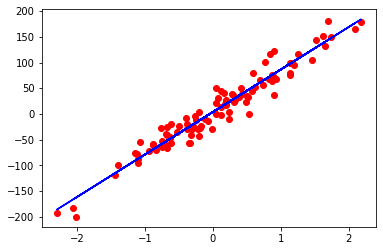

In [70]:
import torch
import torch.nn as nn  #nn -> neural network
import numpy as np
from sklearn import datasets  # for samples
import matplotlib_inline
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
# noise = The standard deviation of the gaussian noise applied to the output.
# random_state = Determines random number generation for dataset creation

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))

# We want to convert Y in column vector

Y = Y.view(Y.shape[0], 1)

n_samples, n_feature = X.shape

# 1) Model
input_size = n_feature
output_size = n_feature

model = nn.Linear(input_size, output_size)

# 2) Loss and Optimizer
learning_rate = 0.01
loss = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training Loop
n_iters = 1000
for epoch in range(n_iters):
    # foward pass
    y_predicted = model(X)
    l = loss(y_predicted, Y)

    # backward pass
    l.backward()

    # update
    optimizer.step()  #update weight
    optimizer.zero_grad()

    if (epoch + 1) % 10 == 0:
        print(f"epoch : {epoch+1}, loss = {l.item():.4f}")


#plot
predicted = model(X).detach().numpy()  # Convert tensor -> np.array. No more gradient calculation.

plt.plot(X_numpy, Y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

**Logisitic Regression**

A logistic regression is use when dealing with binary variables.

In [14]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib_inline
import matplotlib.pyplot as plt

# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  #mean 0 with variance
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)  # y in column vector
y_test = y_test.view(y_test.shape[0], 1)

# 1) Model
# Linear model at first then sigmoid at the extremes
class Logistic(nn.Module):
    def __init__(self, n_input_features):
        super(Logistic, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)  #We want 1 output

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Logistic(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()  #Binary cross entropy loss function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()  #Update weights

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()  #If < 0.5 -> 0 else 1
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  #If y_pred = Y_test -> 1. We do the mean if these 1
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.6292
epoch: 20, loss = 0.5064
epoch: 30, loss = 0.4319
epoch: 40, loss = 0.3820
epoch: 50, loss = 0.3460
epoch: 60, loss = 0.3186
epoch: 70, loss = 0.2970
epoch: 80, loss = 0.2793
epoch: 90, loss = 0.2646
epoch: 100, loss = 0.2520
accuracy: 0.8860
